In [67]:
main_path = '/content/drive/MyDrive/Euron/assignment/week 13-주차수요예측'
import os
train_path = os.path.join(main_path, 'train.csv')
import pandas as pd
train_df = pd.read_csv(train_path)

In [68]:
train_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [69]:
from tqdm import tqdm

train_cols = list(train_df.columns)
train_df.isna().sum() ## 임대 보증금, 임대료, 도보 10분 거리 내 지하철의 수에 대해서 결측치가 존재 


단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [71]:
## 단지 내 적정 수요 예측을 하는 것이 목적 
test_path = os.path.join(main_path, 'test.csv')
submission_path = os.path.join(main_path, 'sample_submission.csv')

test_df = pd.read_csv(test_path) ## test data에 대해서 각 단지에 필요한 주차 자리수를 예측 해야 한다.
test_df.head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0


In [75]:
test_df.isna().sum()

단지코드                             0
총세대수                             0
임대건물구분                           0
지역                               0
공급유형                             0
전용면적                             0
전용면적별세대수                         0
공가수                              0
자격유형                             2
임대보증금                            0
임대료                              0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    42
도보 10분거리 내 버스정류장 수               0
단지내주차면수                          0
dtype: int64

In [73]:
import numpy as np
debt, cost = train_df['임대보증금'], train_df['임대료']
## (1) 임대보증금과 임대료가 object type로 이루어져 있기 때문에 아를 우선적으로 float type로 바꾸어 주어야 한다.
## train dataset에 진행한 전처리를 test dataset에도 동일하게 진행 해 주어야 한다.

train_df.loc[train_df.임대보증금=='-', '임대보증금'] = np.nan 
test_df.loc[test_df.임대보증금=='-', '임대보증금'] = np.nan
train_df['임대보증금'] = train_df['임대보증금'].astype(float)
test_df['임대보증금'] = test_df['임대보증금'].astype(float)

train_df.loc[train_df.임대료=='-', '임대료'] = np.nan
test_df.loc[test_df.임대료=='-', '임대료'] = np.nan
train_df['임대료'] = train_df['임대료'].astype(float)
test_df['임대료'] = test_df['임대료'].astype(float)

## nan으로 바꾸어 준 결측치는 이제 1로 바꾸어 주자
train_df[['임대료', '임대보증금']] = train_df[['임대료', '임대보증금']].fillna(1)


## nan으로 바꾸어 준 결측치는 이제 1로 바꾸어 주자
test_df[['임대료', '임대보증금']] = test_df[['임대료', '임대보증금']].fillna(1)

In [74]:
test_df['자격유형'].unique()

array(['H', 'A', 'E', 'C', 'D', nan, 'G', 'I', 'J', 'K', 'L', 'M', 'N'],
      dtype=object)

In [76]:
## (2) 공급 유형, 주택 단지 그룹화 진행
# (2)-1. '공공'이라는 단어가 들어간 유형들을 하나로, 그리고 나머지를 '국민임대/장기전세'라는 이름으로 바꾸어 준다.
train_df.loc[train_df.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train_df.loc[train_df.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

train_df.loc[train_df.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train_df.loc[train_df.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
train_df.loc[train_df.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'

test_df.loc[test_df.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test_df.loc[test_df.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

test_df.loc[test_df.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

test_df.loc[test_df.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test_df.loc[test_df.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'

In [18]:
ag_path = os.path.join(main_path, 'age_gender_info.csv') ## 각 지역마다 나이 + 성별로 나누어 놓은 분류에 해당하는 인구수의 비율을 나타낸다.
ag_df = pd.read_csv(ag_path)
ag_df.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [22]:
train_df['임대건물구분'].unique() ## '임대건물구분' 속성에도 nan이 22개
print(train_df['임대건물구분'].isna().sum())

21


In [23]:
print(train_df['지역'].isna().sum())

21


In [77]:
## 데이터의 모든 전처리를 마친 이후에야 train_x와 train_y로 분리가 가능하다.
## (3) 문자형 데이터를 숫자로 매핑
local_map = {}
for i, loc in enumerate(train_df['지역'].unique()):
  local_map[loc] = i
#'경상북도': 0, '경상남도': 1, '대전광역시': 2, '경기도': 3, '전라북도': 4, '강원도': 5, '광주광역시': 6, 
# '충청남도': 7, '부산광역시': 8, '제주특별자치도': 9, '울산광역시': 10, '충청북도': 11, '전라남도': 12, '대구광역시': 13, 
# '서울특별시': 14, '세종특별자치시': 15 'nan' : 16

case_map = {}
for i, case in enumerate(train_df['임대건물구분'].unique()):
  case_map[case] = i
#'아파트': 0, '상가': 1 'nan' : 2

supply_map={}
for i, stype in enumerate(train_df['공급유형'].unique()):
    supply_map[stype] =i
#'국민임대': 0, '공공임대(50년)': 1, '영구임대': 2, '임대상가': 3, '공공임대(10년)': 4, 
# '공공임대(분납)': 5, '장기전세': 6, '공공분양': 7, '행복주택': 8, '공공임대(5년)': 9
# ---> 수정됨
#'국민임대/장기전세': 0, '공공임대(50년)': 1, '영구임대': 2, '임대상가': 3, '공공임대(5년/10년/분납/분양)': 4, '행복주택': 5

type_map={}
for i, s_type in enumerate(train_df['자격유형'].unique()):
    type_map[s_type] = i


train_df['지역'] = train_df['지역'].map(local_map)
test_df['지역'] = test_df['지역'].map(local_map)

train_df['임대건물구분'] = train_df['임대건물구분'].map(case_map)
test_df['임대건물구분'] = test_df['임대건물구분'].map(case_map)

train_df['공급유형'] = train_df['공급유형'].map(supply_map)
test_df['공급유형'] = test_df['공급유형'].map(supply_map)

train_df['자격유형'] = train_df['자격유형'].map(type_map)
test_df['자격유형'] = test_df['자격유형'].map(type_map)

In [49]:
test_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754.0,0,3,0,39.79,116.0,14.0,1,22830000,189840,0.0,2.0,683.0
1,C1072,754.0,0,3,0,46.81,30.0,14.0,0,36048000,249930,0.0,2.0,683.0
2,C1072,754.0,0,3,0,46.90,112.0,14.0,1,36048000,249930,0.0,2.0,683.0
3,C1072,754.0,0,3,0,46.90,120.0,14.0,1,36048000,249930,0.0,2.0,683.0
4,C1072,754.0,0,3,0,51.46,60.0,14.0,1,43497000,296780,0.0,2.0,683.0


In [78]:
train_df.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                             0
임대료                               0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

1. `도보 10분거리 내 지하철역 수(환승노선 수 반영)`
  - 과연 위의 속성이 중요한 정보일지가 궁금,,

In [ ]:
x_train = new_train.iloc[:, 1:-1]
y_train = new_train.iloc[:,-1] ## 예측해야 하는 값인 실제 주차 수요를 수치화한 데이터이다.
x_test = new_test.iloc[:,1:] 

In [ ]:
from sklearn.metrics import make_scorer
def rmse(p,a):
  """
  rooted mean square error
  """
  difference = p-a
  squared = difference ** 2
  mean = squared.mean()
  score = np.sqrt(mean)
  return score

rmse_scorer = make_scorer(rmse, greater_is_better=False) 
rmse_scorer

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
## choose the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth':[1,2,3,4,5,6,7],
    'random_state':[10,30,50,70,90],
}
GS = GridSearchCV(model, param_grid=parameters, cv=20, scoring=rmse_scorer)
GS.fit(x_train,y_train)

GS.best_params_

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error

model_Lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.1, random_state = 20)) ## lasso net
model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=20)) ## elastic net
model_GBoost = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.05, max_depth=4,max_features='sqrt', min_samples_leaf=10,min_samples_split=5,loss='huber',random_state=90) ## gradient boosting

model_Lasso.fit(x_train, y_train)
Lasso_predictions=model_Lasso.predict(x_test)
train_Lasso=model_Lasso.predict(x_train)

model_ENet.fit(x_train, y_train)
ENet_predictions=model_ENet.predict(x_test)
train_ENet=model_ENet.predict(x_train)

model_GBoost.fit(x_train, y_train)
GBoost_predictions=model_GBoost.predict(x_test)
train_GBoost=model_GBoost.predict(x_train)

- METRICS

In [ ]:
def PSNR(pred, gt):
  """
  pred : inferenced image, which is the output of the model
  gt   : the ground truth image that should be the output of the model
  PSNR = 10 * log(S^2 / MSE)
  """
  MSE = np.mean((pred-gt) ** 2)
  if MSE == 0:
    return 1 ## 완벽하게 일치한다는 뜻
  if (float(gt.max()) == 255.0):
    S = 255.0
  else:
    S = gt.max()
  return 10 * np.log(S**2 / MSE)

  

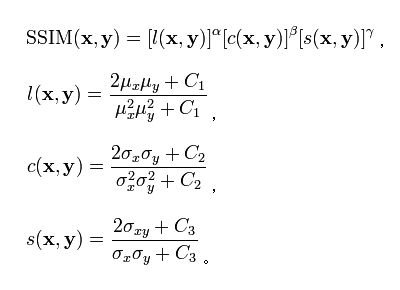

- Gaussian Blurring
  1. low-pass filter을 사용해서 gaussian function에 의해서 생성된 값들을 filter weight로서 사용하는 blurring방법이라고 할 수 있다.
  2. 일반적으로 이미지에 생기는 잡음들이 정규분포를 따른다는 가정이 있을 수 있다.
  3. 그런데 denoising model에 대한 ground truth를 도출해 내기가 어렵다 보니 현재는 self-supervised learning을 기반으로 해서 generative 생성 모델을 많이 사용하기도 한다. 
    - Feature Extraction(하나의 convolution layer만을 사용) -> Feature Learning(EAM모듈을 여러개 사용) -> Reconstruction (하나의 convolution layer사용 + Long Skip Residual Network)
    - Denoising을 한다는 것은 결국에는 이미지에서 noise 부분과 실제 critical feature을 분리 해내는 작업이기 때문에 blurring이나 noise를 추가하는 것과 역방향으로 filtering을 적용하기도 한다.

In [ ]:
## Neural Network Architecture을 위한 기본적인 common modules
import torch
import torch.nn as nn
import torch.nn.functional as F


class ConvBlock(nn.Module):
    """2D convolution block with normalization and activation functions."""

    def __init__(self,
                 in_channels,
                 out_channels,
                 dropout=False,
                 norm='batch',
                 residual=True,
                 activation='leakyrelu',
                 transpose=False):
        super().__init__()
        self.dropout = dropout
        self.residual = residual
        self.activation = activation
        self.transpose = transpose

        if self.dropout:
            self.dropout1 = nn.Dropout2d(p=0.05)
            self.dropout2 = nn.Dropout2d(p=0.05)

        self.norm1 = None
        self.norm2 = None
        if norm == 'batch':
            self.norm1 = nn.BatchNorm2d(out_channels)
            self.norm2 = nn.BatchNorm2d(out_channels)
        elif norm == 'instance':
            self.norm1 = nn.InstanceNorm2d(out_channels, affine=True)
            self.norm2 = nn.InstanceNorm2d(out_channels, affine=True)
        elif norm == 'mixed':
            self.norm1 = nn.BatchNorm2d(out_channels, affine=True)
            self.norm2 = nn.InstanceNorm2d(out_channels, affine=True)

        if self.transpose:
            self.conv1 = nn.ConvTranspose2d(in_channels,
                                            out_channels,
                                            kernel_size=3,
                                            padding=1)
            self.conv2 = nn.ConvTranspose2d(out_channels,
                                            out_channels,
                                            kernel_size=3,
                                            padding=1)
        else:
            self.conv1 = nn.Conv2d(in_channels,
                                   out_channels,
                                   kernel_size=3,
                                   padding=1)
            self.conv2 = nn.Conv2d(out_channels,
                                   out_channels,
                                   kernel_size=3,
                                   padding=1)

        if self.activation == 'relu':
            self.actfun1 = nn.ReLU()
            self.actfun2 = nn.ReLU()
        elif self.activation == 'leakyrelu':
            self.actfun1 = nn.LeakyReLU()
            self.actfun2 = nn.LeakyReLU()
        elif self.activation == 'elu':
            self.actfun1 = nn.ELU()
            self.actfun2 = nn.ELU()
        elif self.activation == 'selu':
            self.actfun1 = nn.SELU()
            self.actfun2 = nn.SELU()

    def forward(self, x):
        ox = x

        x = self.conv1(x)

        if self.dropout:
            x = self.dropout1(x)

        if self.norm1:
            x = self.norm1(x)

        x = self.actfun1(x)

        x = self.conv2(x)

        if self.dropout:
            x = self.dropout2(x)

        if self.norm2:
            x = self.norm2(x)

        if self.residual:
            x[:, 0:min(ox.shape[1], x.shape[1]
                      ), :, :] += ox[:, 0:min(ox.shape[1], x.shape[1]), :, :]

        x = self.actfun2(x)

        # print("shapes: x:%s ox:%s " % (x.shape,ox.shape))

        return x


class MeanShift(nn.Conv2d):
    """Mean and shift layer."""

    def __init__(self, rgb_range, rgb_mean, rgb_std, n_channels=3, sign=-1):
        super().__init__(n_channels, n_channels, kernel_size=1)
        std = torch.Tensor(rgb_std)
        self.weight.data = torch.eye(n_channels).view(n_channels, n_channels, 1,
                                                      1)
        self.weight.data.div_(std.view(n_channels, 1, 1, 1))
        self.bias.data = sign * rgb_range * torch.Tensor(rgb_mean)
        self.bias.data.div_(std)
        self.requires_grad = False


class BasicBlock(nn.Module):
    """2D convolution block with ReLU."""

    def __init__(self, in_channels, out_channels, ksize=3, stride=1, pad=1):
        super().__init__()

        self.body = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, ksize, stride, pad),
            nn.ReLU(inplace=True))

    def forward(self, x):
        out = self.body(x)
        return out


class BasicBlockSig(nn.Module):
    """2D convolution block with Sigmoid."""

    def __init__(self, in_channels, out_channels, ksize=3, stride=1, pad=1):
        super().__init__()

        self.body = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, ksize, stride, pad),
            nn.Sigmoid())

    def forward(self, x):
        out = self.body(x)
        return out


class ResidualBlock(nn.Module):
    """Residual block."""

    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.body = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
        )

    def forward(self, x):
        out = self.body(x)
        out = F.relu(out + x)
        return out


class EResidualBlock(nn.Module):
    """Extended residual block."""

    def __init__(self, in_channels, out_channels, group=1):
        super().__init__()

        self.body = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, groups=group),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, groups=group),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 1, 1, 0),
        )

    def forward(self, x):
        out = self.body(x)
        out = F.relu(out + x)
        return out


class MergeRun(nn.Module):
    """Module of 3 Conv blocks"""

    def __init__(self, in_channels, out_channels, ksize=3, stride=1, pad=1):
        super().__init__()

        self.body1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, ksize, stride, pad),
            nn.ReLU(inplace=True))
        self.body2 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, ksize, stride, 2, 2),
            nn.ReLU(inplace=True))

        self.body3 = nn.Sequential(
            nn.Conv2d(in_channels * 2, out_channels, ksize, stride, pad),
            nn.ReLU(inplace=True))

    def forward(self, x):
        out1 = self.body1(x)
        out2 = self.body2(x)
        c = torch.cat([out1, out2], dim=1)
        c_out = self.body3(c)
        out = c_out + x
        return out


class MergeRunDual(nn.Module):
    """Module running 3x2 Conv blocks"""

    def __init__(self, in_channels, out_channels, ksize=3, stride=1, pad=1):
        super().__init__()

        self.body1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, ksize, stride, pad),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, ksize, stride, 2, 2),
            nn.ReLU(inplace=True))
        self.body2 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, ksize, stride, 3, 3),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, ksize, stride, 4, 4),
            nn.ReLU(inplace=True))

        self.body3 = nn.Sequential(
            nn.Conv2d(in_channels * 2, out_channels, ksize, stride, pad),
            nn.ReLU(inplace=True))

    def forward(self, x):
        out1 = self.body1(x)
        out2 = self.body2(x)
        c = torch.cat([out1, out2], dim=1)
        c_out = self.body3(c)
        out = c_out + x
        return out


In [ ]:
import torch.nn as nn


class CALayer(nn.Module):
    """Final layers of EAM block for compression and attention."""

    def __init__(self, channel, reduction=16):
        super().__init__()

        self.avg_pool = nn.AdaptiveAvgPool2d(1)

        self.c1 = BasicBlock(channel, channel // reduction, 1, 1, 0)
        self.c2 = BasicBlockSig(channel // reduction, channel, 1, 1, 0)

    def forward(self, x):
        y = self.avg_pool(x)
        y1 = self.c1(y)
        y2 = self.c2(y1)
        return x * y2


class Block(nn.Module):
    """Block of Enhancement Attention Module (EAM) for RIDNet."""

    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.r1 = MergeRunDual(in_channels, out_channels)
        self.r2 = ResidualBlock(in_channels, out_channels)
        self.r3 = EResidualBlock(in_channels, out_channels)
        #self.g = ops.BasicBlock(in_channels, out_channels, 1, 1, 0)
        self.ca = CALayer(in_channels)

    def forward(self, x):

        r1 = self.r1(x)
        r2 = self.r2(r1)
        r3 = self.r3(r2)
        #g = self.g(r3)
        out = self.ca(r3)

        return out


class RIDNet(nn.Module):
    """RIDNet model."""

    def __init__(self, n_channels=1, kernel_size=3, n_feats=64):
        """
        n_feats: number of feature maps
        reduction: number of feature maps reduction
        """

        super().__init__()

        self.n_channels = n_channels

        if n_channels == 3:
            rgb_range = 1.0
            #rgb_mean = (0.4488, 0.4371, 0.4040)
            #rgb_std = (1.0, 1.0, 1.0)
            rgb_mean = (0.472396, 0.447755, 0.408062)
            #rgb_std = (0.287142, 0.282695, 0.294265)
            rgb_std = (1.0, 1.0, 1.0)
            self.sub_mean = MeanShift(rgb_range, rgb_mean, rgb_std)
            self.add_mean = MeanShift(rgb_range, rgb_mean, rgb_std, sign=1)
        else:
            rgb_range = 1.0
            rgb_mean = [0.38449]
            #rgb_mean = 0.30712
            #rgb_mean = 0.31479
            rgb_std = [1.0]
            self.sub_mean = MeanShift(rgb_range, rgb_mean, rgb_std, 1)
            self.add_mean = MeanShift(rgb_range, rgb_mean, rgb_std, 1, 1)

        self.head = BasicBlock(n_channels, n_feats, kernel_size, 1, 1)

        self.b1 = Block(n_feats, n_feats)
        self.b2 = Block(n_feats, n_feats)
        self.b3 = Block(n_feats, n_feats)
        self.b4 = Block(n_feats, n_feats)

        self.tail = nn.Conv2d(n_feats, n_channels, kernel_size, 1, 1, 1)

    def forward(self, x):

        s = self.sub_mean(x)

        h = self.head(s)

        b1 = self.b1(h)
        b2 = self.b2(b1)
        b3 = self.b3(b2)
        b_out = self.b4(b3)

        res = self.tail(b_out)

        res = self.add_mean(res)

        out = res + x

        return out


- `MeanShift` : the module that adds/subtracts the channel wise mean from the input/output images

In [ ]:
import math
import numpy as np
import cv2

def ssim(pred, gt):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = pred.astype(np.float64) ## 모델이 예측한 이미지
    img2 = gt.astype(np.float64) ## 실제 예측해야 하는 이미지
    kernel = cv2.getGaussianKernel(11, 1.5) ## gaussian kernel
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')

In [ ]:
import torch

def compute_std(img):
  std = torch.zeros(1)
  N_channels = img.shape[1] ## channel수
  for c in range(N_channels):
    std[c] += img[:, c, :, :].std() 
  return std

def SSIM(pred, gt):
  pred_std, gt_std = compute_std(pred), compute_std(gt)
  
